## How is the dispersal rate estimation by BEAST affected by sampling area and dispersal model?

This notebook investigates how a circular **sampling area** influences the accuracy and variability of dispersal rate estimates inferred by BEAST using continuous phylogeographic diffusion models.

---

### GSpace simulation using various sampling areas

We simulate sequence data under controlled spatial population genetic conditions using GSpace. The key variable in this notebook is the **sampling radius** $r$, which defines the radius of the sampling area starting from the center of the grid.

#### Sampling strategy:

Sampling is performed in a circular region centered on the lattice midpoint. For each node:

-	A random angle $\phi \sim \mathcal{U}(0, 2\pi)$ is drawn to ensure isotropic sampling.
-	A random radius $r{\prime} \sim \mathcal{U}(0, r)$ is drawn to achieve uniform density over the area of the circle.
-	Using trigonometric transformation, polar coordinates are converted to Cartesian:
$x = x_{\text{center}} + r{\prime} \cdot \cos(\phi)$, $\quad y = y_{\text{center}} + r{\prime} \cdot \sin(\phi)$
-	The resulting floating-point coordinate is mapped to the nearest integer lattice node via Euclidean distance minimization among the four surrounding nodes.
-	Only nodes strictly within the lattice boundaries are retained.

### Workflow:

In [1]:
import shutil
from utils.gspace_utils import *
from utils.beast_utils import *
from utils.misc_utils import *

g_mutation_rate=0.00001
radii = [1, 10, 50, 100]

#### 1. Set the working directory

Set the working where your GSpaceSettings.txt file will be generated. further results of the analysis will be found here as well.

In [2]:
set_tests_dir()

Moved into 'Tests' directory. Current working directory: /Users/ayoubrayaneaitallaoua/Documents/LIRMM/Pathogen_Dispersal_Rate_Estimation/Tests


#### 2. generate GSpace Settings.txt with variable radii

In [3]:
#for radius in radii:
generate_gspace_settings_circular_sample(r=50, mutation_rate=g_mutation_rate)

GSpaceSettings_r_1.txt generated with circular sampling in .!
GSpaceSettings_r_10.txt generated with circular sampling in .!
GSpaceSettings_r_50.txt generated with circular sampling in .!
GSpaceSettings_r_100.txt generated with circular sampling in .!


#### 3. visualize the sampling

GSpaceSettings_r_30.txt generated with circular sampling in .!


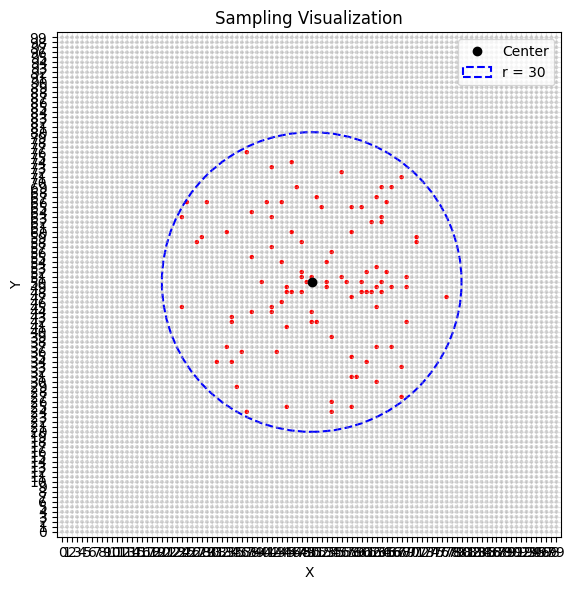

In [5]:
lattice_size_x = 100
lattice_size_y = 100
r = 30
data = generate_gspace_settings_circular_sample(lattice_size_x=lattice_size_x, lattice_size_y=lattice_size_y,r=r, mutation_rate=g_mutation_rate, num_sampled_nodes=100)
plot_sampling(100,100,data,r)

#### 3. run GSpace simulations

In [4]:
for radius in radii:

        # make a dir for each radius
        os.mkdir(f"result_r_{radius}")

        # move the GSpacesettings_r_{r}.txt files into their respective directories
        shutil.move(
            f"GSpacesettings_r_{radius}.txt",
            f"result_r_{radius}/GSpacesettings_r_{radius}.txt")

        # change directories for each radius and rename the file
        os.chdir(f"result_r_{radius}")
        os.rename(f"GSpaceSettings_r_{radius}.txt","GSpaceSettings.txt")

        # run GSpace
        run_gspace(gspace_dir="../../../GSpace/build/GSpace")

        # go back to Tests dir
        os.chdir("..")

reading settings file : GSpaceSettings.txt

Random assignation 1 chromosome MRCA nucleotidic states. Press any key to resume.


         This is  GSpace  v0.1 (Built on Apr 22 2025 at 15:19:09)    
               (Virgoulay et al. 2020 Bioinformatics)                       
         an exact coalescent simulator of genetic /  genomic data           
            under generalized models of isolation by distance               
Settings summary : Generic output filename is sim_seqs_r_1
 Simulation of 1 data sets
   with 1 chromosomes / independant loci with 1000 linked sites /  loci each. 
 Mutation model is hky
   with a mutation rate of 1e-05 mutations per site per generation.
   and a recombination rate of 0 between adjacent sites per generation.
Homogeneous sample of size (4x4)*5 = 80 haploid individuals 
evolving on a 20 x 20 lattice with reflecting boundaries
  where each node carries 30 individuals.
Dispersal settings are summarized in the sim_seqs_r_1_GSpace_param_summary.txt file

#### 4. generate BEAST XML files

In [ ]:
set_tests_dir()

for radius in radii:
    os.chdir(f"result_r_{radius}")
    generate_beast_xml(output_xml=f"r_{radius}.xml", mutation_rate=g_mutation_rate)
    os.chdir("..")

print(f"current working directory:{os.getcwd()}")

#### 5. run BEAST for each simulation

In [ ]:
print(os.getcwd())
for radius in radii:
    os.chdir(f"result_r_{radius}")
    run_beast(xml_file=f"r_{radius}.xml",beast_path="../../../BEAST/bin/beast")
    os.chdir("..")